In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
N = 10**5

In [4]:
df = pd.DataFrame(columns = ["N","methodA","methodB"])

### method A (Eratosthenes)

In [6]:
start = time.time()
a = set(range(2,N+1))
n = N**0.5
c = 0
while True:
    i = list(a)[c]
    if i > n:
        break
    if i in a:
        a -= set(range(i*2,N+1,i))
        c += 1

print(len(a), time.time() - start)

9592 0.13048148155212402


### method B (paper's new method)

In [7]:
start = time.time()
A = set()
B = set(range(3,N+1,2))

k = int((N**0.5-1)/2)

for i in range(1,k+1):
    t = int((N-(2*i+1)**2)/(2*(2*i+1)))
    for n in range(t+1):
        A.add((2*i+1)*(2*i+1+2*n))

a = B-A
a.add(2)
print(len(a), time.time() - start)

9592 0.12700414657592773


In [8]:
lst = [500000 * i for i in range(2,21)]
lst

[1000000,
 1500000,
 2000000,
 2500000,
 3000000,
 3500000,
 4000000,
 4500000,
 5000000,
 5500000,
 6000000,
 6500000,
 7000000,
 7500000,
 8000000,
 8500000,
 9000000,
 9500000,
 10000000]

In [4]:
"""
for N in lst:
    start = time.time()
    a = set(range(2,N+1))
    n = N**0.5
    c = 0
    while True:
        i = list(a)[c]
        if i > n:
            break
        if i in a:
            a -= set(range(i*2,N+1,i))
            c += 1

    t1 = time.time() - start
    
    start = time.time()
    A = set()
    B = set(range(3,N+1,2))

    k = int((N**0.5-1)/2)

    for i in range(1,k+1):
        t = int((N-(2*i+1)**2)/(2*(2*i+1)))
        for n in range(t+1):
            A.add((2*i+1)*(2*i+1+2*n))

    a = B-A
    a.add(2)
    t2 = time.time() - start
    print(N,t1,t2)
    df.loc[len(df)] = {"N" : N, "methodA" : t1, "methodB" : t2}
"""

In [33]:
df = pd.DataFrame(columns = ["N","methodA","methodB"])

In [64]:
x = []
y1 = []
y2 = []

In [65]:
for i in ("""1000000 1.7080001831054688 0.9499707221984863
1500000 2.4274137020111084 1.375295639038086
2000000 3.1648786067962646 1.7049450874328613
2500000 3.9611294269561768 2.356786012649536
3000000 5.0182783603668213 3.1785850524902344
3500000 7.125149488449097 3.765899419784546
4000000 7.462851285934448 4.018891096115112
4500000 10.676944494247437 4.272104740142822
5000000 11.333355903625488 4.6751933097839355
5500000 12.9663004875183105 5.86046028137207
6000000 14.0929553508758545 6.0851733684539795
6500000 16.20210289955139 7.145481109619141
7000000 17.313822746276855 7.227780103683472
7500000 20.380670309066772 8.263086318969727
8000000 22.343668222427368 8.72058367729187
8500000 26.10925006866455 9.27419376373291
9000000 31.568542003631592 10.44149374961853
9500000 34.504643440246582 10.047656536102295
10000000 40.13622260093689 11.362022876739502""".split("\n")):
    print(i)
    N, t1, t2 = i.split()
    #df.loc[len(df)] = {"N" : str(N), "methodA" : t1, "methodB" : t2}
    x.append(int(N)//500000)
    y1.append(float(t1))
    y2.append(float(t2))

1000000 1.7080001831054688 0.9499707221984863
1500000 2.4274137020111084 1.375295639038086
2000000 3.1648786067962646 1.7049450874328613
2500000 3.9611294269561768 2.356786012649536
3000000 5.0182783603668213 3.1785850524902344
3500000 7.125149488449097 3.765899419784546
4000000 7.462851285934448 4.018891096115112
4500000 10.676944494247437 4.272104740142822
5000000 11.333355903625488 4.6751933097839355
5500000 12.9663004875183105 5.86046028137207
6000000 14.0929553508758545 6.0851733684539795
6500000 16.20210289955139 7.145481109619141
7000000 17.313822746276855 7.227780103683472
7500000 20.380670309066772 8.263086318969727
8000000 22.343668222427368 8.72058367729187
8500000 26.10925006866455 9.27419376373291
9000000 31.568542003631592 10.44149374961853
9500000 34.504643440246582 10.047656536102295
10000000 40.13622260093689 11.362022876739502


In [35]:
df

,N,methodA,methodB
0,1000000,1.7080001831054688,0.9499707221984863
1,1500000,2.4274137020111084,1.375295639038086
2,2000000,3.1648786067962646,1.7049450874328613
3,2500000,3.9611294269561768,2.356786012649536
4,3000000,5.0182783603668213,3.1785850524902344
5,3500000,7.125149488449097,3.765899419784546
6,4000000,7.462851285934448,4.018891096115112
7,4500000,10.676944494247437,4.272104740142822
8,5000000,11.333355903625488,4.6751933097839355
9,5500000,12.9663004875183105,5.86046028137207


In [56]:
x

[]

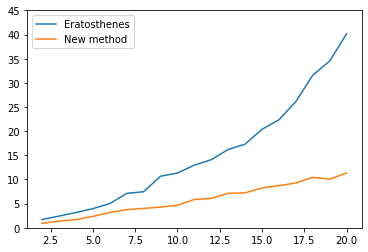

In [67]:
plt.ylim(0,45)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Eratosthenes","New method"])
plt.show()